In [33]:
import torch
import requests

from PIL import Image, ImageDraw
from transformers import AutoImageProcessor, AutoModelForObjectDetection

In [34]:
image = Image.open("./data/detr_data/test dataset/images/0f7db672-drawing_88.png")

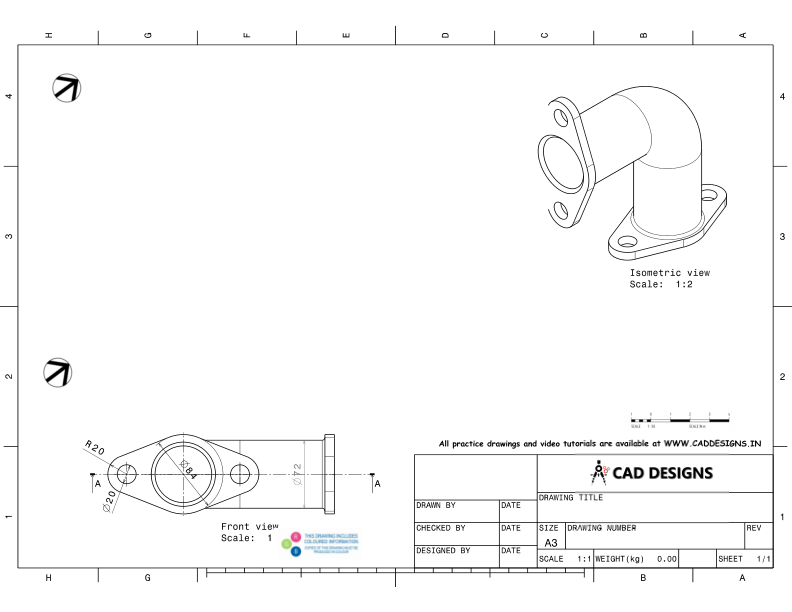

In [35]:
image

In [36]:
# Load lacally saved checkpoint

MAX_SIZE = 480

image_processor = AutoImageProcessor.from_pretrained(
    "facebook/detr-resnet-50",
    do_resize=True,
    size={"max_height": MAX_SIZE, "max_width": MAX_SIZE},
    do_pad=True,
    pad_size={"height": MAX_SIZE, "width": MAX_SIZE},
)

In [45]:
state_dict = torch.load("./detr_finetuned_/checkpoint-456/rng_state.pth")

C:\Users\Shrirang_Mahajan\AppData\Local\Temp\ipykernel_340\3651916922.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("./detr_finetuned_/checkpoi

In [46]:
model = AutoModelForObjectDetection.from_pretrained("facebook/detr-resnet-50", state_dict=state_dict)

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['cpu', 'numpy', 'python']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DetrForObjectDetection were not initialized from the model checkpoint at facebook/detr-resnet-50 and are newly initialized: ['backbone.conv_encoder.model.bn1.bias', 'backbone.conv_encoder.model.bn1.running_mean', 'backbone.conv_encoder.model.bn1.running_var', 'backbone.conv_encoder.model.bn1.weight', 'backbone.conv_encoder.model.conv1.weight', 'backbone.co

In [47]:
inputs = image_processor(images=[image], return_tensors="pt")

In [48]:
outputs = model(**inputs)

In [49]:
target_sizes = torch.tensor([[image.size[1], image.size[0]]])
results = image_processor.post_process_object_detection(outputs, threshold=0.0, target_sizes=target_sizes)[0]

In [50]:
results

{'scores': tensor([0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242,
         0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242,
         0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242,
         0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242,
         0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242,
         0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242,
         0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242,
         0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242,
         0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242,
         0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242,
         0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242, 0.0242,
         0.0242], grad_fn=<IndexBackward0>),
 'labels': tensor([82, 82, 82, 82, 82, 82, 82, 82, 82,

In [51]:
with torch.no_grad():
    inputs = image_processor(images=[image], return_tensors="pt")
    outputs = model(**inputs.to("cpu"))
    target_sizes = torch.tensor([[image.size[1], image.size[0]]])
    results = image_processor.post_process_object_detection(outputs, threshold=0.0, target_sizes=target_sizes)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"Detected {model.config.id2label[label.item()]} with confidence "
        f"{round(score.item(), 3)} at location {box}"
    )

Detected refrigerator with confidence 0.024 at location [195.09, 156.72, 589.46, 455.4]
Detected refrigerator with confidence 0.024 at location [195.09, 156.72, 589.46, 455.4]
Detected refrigerator with confidence 0.024 at location [195.09, 156.72, 589.46, 455.4]
Detected refrigerator with confidence 0.024 at location [195.09, 156.72, 589.46, 455.4]
Detected refrigerator with confidence 0.024 at location [195.09, 156.72, 589.46, 455.4]
Detected refrigerator with confidence 0.024 at location [195.09, 156.72, 589.46, 455.4]
Detected refrigerator with confidence 0.024 at location [195.09, 156.72, 589.46, 455.4]
Detected refrigerator with confidence 0.024 at location [195.09, 156.72, 589.46, 455.4]
Detected refrigerator with confidence 0.024 at location [195.09, 156.72, 589.46, 455.4]
Detected refrigerator with confidence 0.024 at location [195.09, 156.72, 589.46, 455.4]
Detected refrigerator with confidence 0.024 at location [195.09, 156.72, 589.46, 455.4]
Detected refrigerator with confi

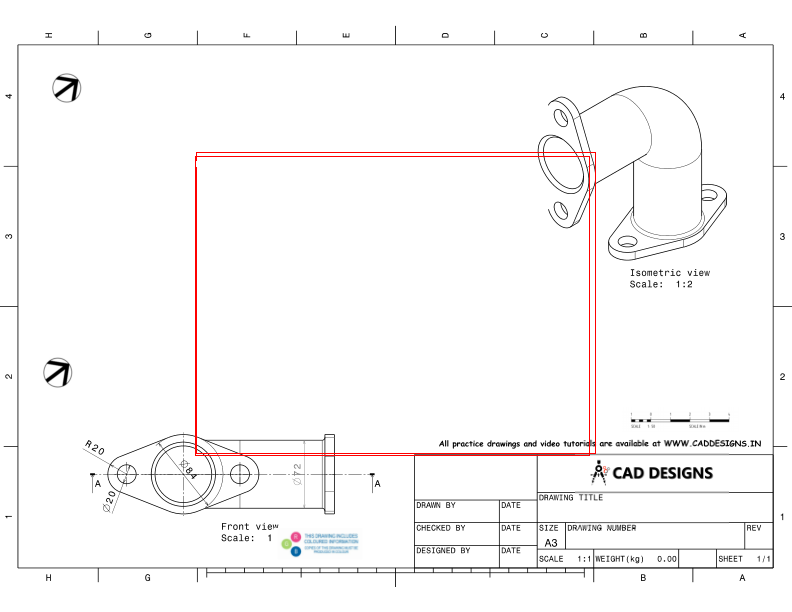

In [52]:
draw = ImageDraw.Draw(image)

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    x, y, x2, y2 = tuple(box)
    draw.rectangle((x, y, x2, y2), outline="red", width=1)
    draw.text((x, y), model.config.id2label[label.item()], fill="white")

image